# Breast Cancer - IA 2024

This project consists in the application of machine learning models and algorithms
related to supervised learning. 

- 0. Business Understanding 
    - 0.1. Business Goals
    - 0.2. Data Mining Problem Definition
    - 0.3. Data Mining Goals
- 1. Data Understanding
    - 1.1. About the Dataset
    - 1.2. Initial Data
    - 1.3. Explore Data
    - 1.4. Data Quality
- 2. Data Preparation
- 3. Modeling
    - 3.1. Decision Trees
    - 3.2. Neural Networks
    - 3.3. K-NN
- 4. Evaluation

## 0. Business Understanding

#### 0.1. Business Goals

We aim to improve healthcare outcomes using the breast cancer dataset. Our goal is to develop predictive models that reduce misdiagnosis rates, minimize unnecessary procedures, and enhance treatment outcomes for patients with breast masses.

#### 0.2. Data Mining Problem Definition

Our task is to create a model that accurately classifies breast masses as malignant or benign using features from digitized images. This model will help healthcare professionals make timely and accurate diagnoses, improving treatment planning and patient management.

#### 0.3. Data Mining Goals

Our goals include building an accurate predictive model and identifying key features that contribute to classification. We aim to enhance model interpretability and integration into clinical practice for better patient care.

One of the primary performance indicators for our predictive model is the accuracy rate, which measures the overall correctness of the model in classifying breast masses as either malignant or benign. Accuracy is a crucial metric in medical diagnostics as it directly impacts clinical decision-making and patient care. For this project, our target is to achieve a minimum accuracy rate of 90%.

## 1. Data Understanding

The Breast Cancer dataset consists of features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe characteristics of cell nuclei present in the image.

### 1.1. About the Dataset

The dataset contains 569 registers 62.7% being of type B (Benign) and 37.3% being of type M (Malignant) and is composed of 32 attributes. 

These attributes are:
- **ID**: Unique identifier for each sample.
- **Diagnosis**: The diagnosis of the breast mass (Malignant - M, Benign - B).
- **Radius Mean**: Mean of distances from the center to points on the perimeter.
- **Texture Mean**: Standard deviation of gray-scale values.
- **Perimeter Mean**: Mean size of the core tumor.
- **Area Mean**: Mean area of the core tumor.
- **Smoothness Mean**: Mean smoothness of the cell nuclei.
- **Compactness Mean**: Mean compactness of the cell nuclei.
- **Concavity Mean**: Mean concavity of the cell nuclei.
- **Concave Points Mean**: Mean number of concave portions of the contour.
- **Symmetry Mean**: Mean symmetry of the cell nuclei.
- **Fractal Dimension Mean**: Mean "coastline approximation" - 1.
- **Radius SE**: Standard error for the mean of distances from the center to points on the perimeter.
- **Texture SE**: Standard error for the standard deviation of gray-scale values.
- **Perimeter SE**: Standard error for the mean size of the core tumor.
- **Area SE**: Standard error for the mean area of the core tumor.
- **Smoothness SE**: Standard error for the mean smoothness of the cell nuclei.
- **Compactness SE**: Standard error for the mean compactness of the cell nuclei.
- **Concavity SE**: Standard error for the mean concavity of the cell nuclei.
- **Concave Points SE**: Standard error for the mean number of concave portions of the contour.
- **Symmetry SE**: Standard error for the mean symmetry of the cell nuclei.
- **Fractal Dimension SE**: Standard error for the mean "coastline approximation" - 1.
- **Radius Worst**: Largest radius measured from the center to the perimeter of the tumor.
- **Texture Worst**: Highest variation in gray-scale values in the tumor.
- **Perimeter Worst**: Largest perimeter measurement of the tumor.
- **Area Worst**: Largest area measurement of the tumor.
- **Smoothness Worst**: Highest level of surface irregularity measured on the tumor cells.
- **Compactness Worst**: Greatest density of the tumor cells (closeness of the cells).
- **Concavity Worst**: Largest concavity observed in the tumor cell contours.
- **Concave Points Worst**: Maximum number of concave points detected on the tumor contour.
- **Symmetry Worst**: Least symmetry observed in the tumor cells.
- **Fractal Dimension Worst**: Highest complexity observed in the tumor cell borders.

Target Variable:
- **Diagnosis**: Malignant (M) or Benign (B).

### 1.2. Initial Data

In [36]:
import pandas
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D


df = pandas.read_csv("../data/data.csv")

df.drop(['id'], axis=1, inplace=True) # Drop the 'id' column as it is not needed for analysis

df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 1.3. Explore Data

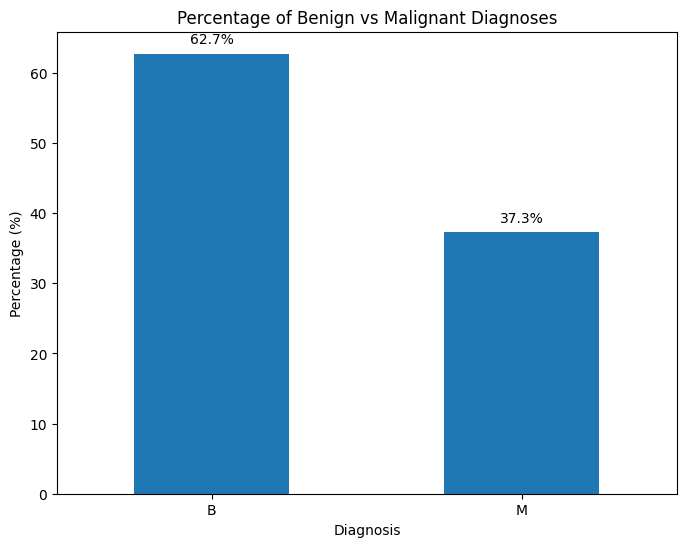

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
diagnosis_counts = df['diagnosis'].value_counts(normalize=True) * 100  # Convert to percentages

plt.figure(figsize=(8, 6))
ax = diagnosis_counts.plot(kind='bar') # Create a bar plot for percentages
plt.title('Percentage of Benign vs Malignant Diagnoses')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0) 

# Show the percentages on the bars for better understanding
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

df.describe() # Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution

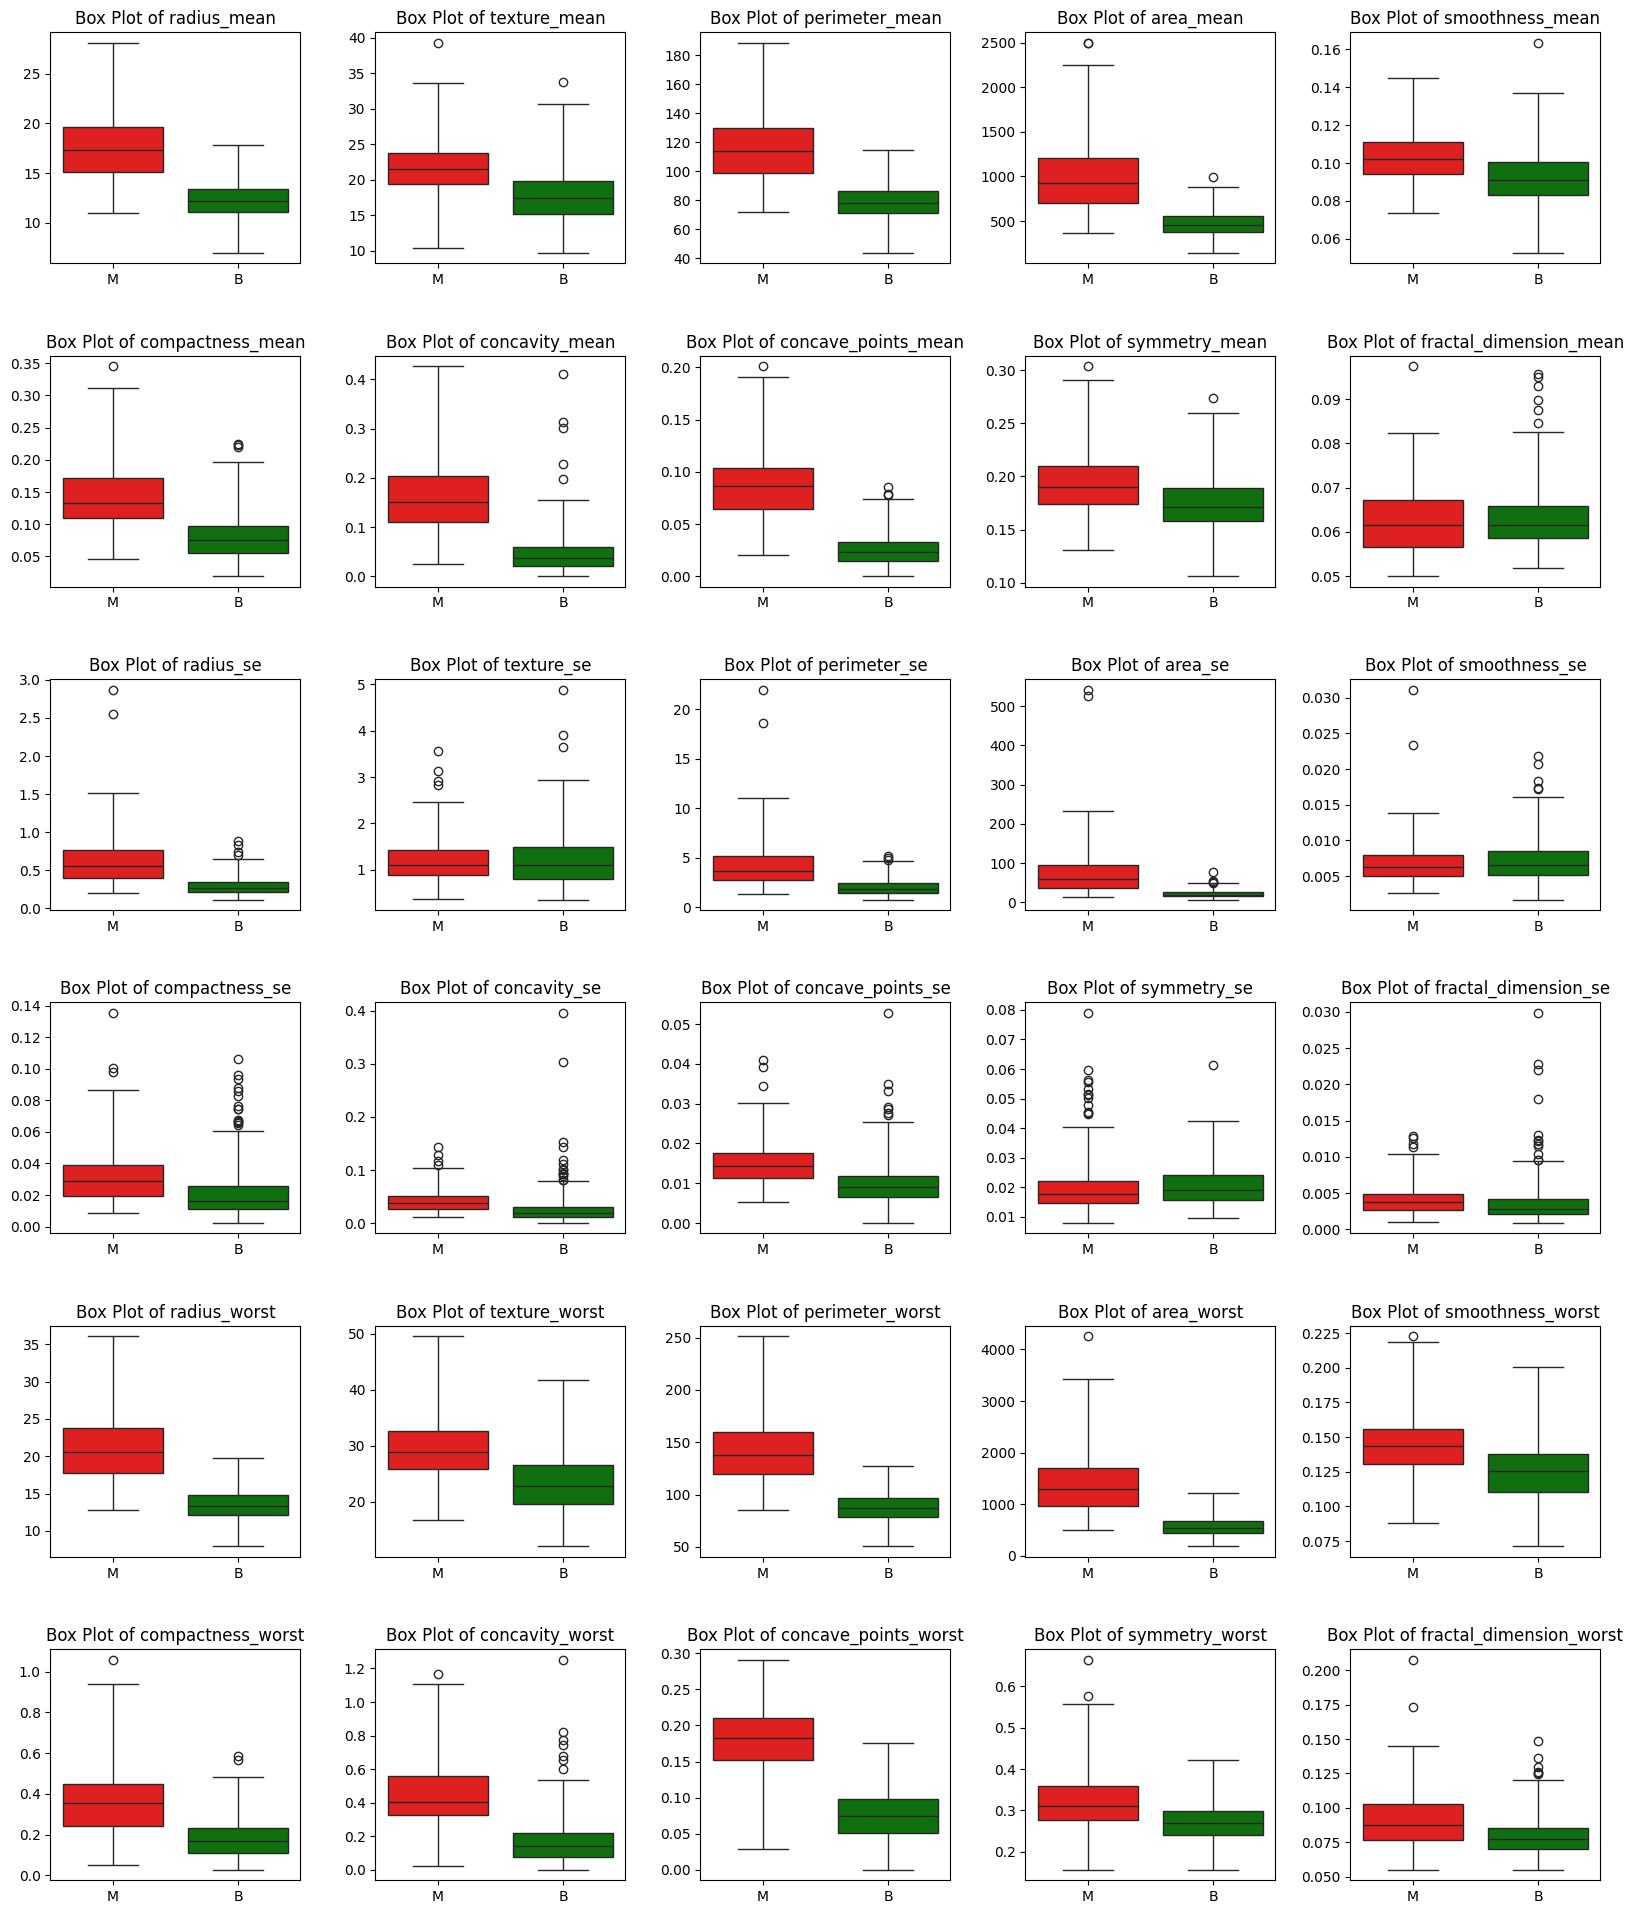

In [11]:
def box_plot():

    # Select numeric columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    n_cols = 5  # Number of columns for subplots
    n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))  # Create subplots
    fig.subplots_adjust(hspace=0.4, wspace=0.3)  # Adjust the space between subplots

    custom_palette = {'B': 'green', 'M': 'red'}  # B for benign, M for malignant

    # Plot each boxplot on a subplot
    for index, column in enumerate(numeric_columns):
        row = index // n_cols
        col = index % n_cols

        # Adjust the whis parameter to extend the whiskers
        sb.boxplot(x='diagnosis', y=column, hue='diagnosis', data=df, ax=axs[row, col], palette=custom_palette, whis=2.5, legend=False)  
        axs[row, col].set_title(f'Box Plot of {column}')
        axs[row, col].set_xlabel('')
        axs[row, col].set_ylabel('')

    if len(numeric_columns) % n_cols != 0:  # Hide the last subplot if it is not used
        for ax in axs.flat[len(numeric_columns):]:
            ax.set_visible(False)

    plt.show()

box_plot()


The box plot visualizes the distribution of data, highlighting the median, interquartile range (IQR), and overall variability within each class.

By extending the whiskers to 2.5 times the IQR, we capture a broader data range, reducing the number of points considered outliers. These whiskers indicate the minimum and maximum values within this adjusted range, while outliers — values that are unusually high or low relative to the rest of the data — are displayed as individual points outside the whiskers. These points will be addressed later in the analysis.

Additionally, the analysis suggests potential correlations among some values. Confirming these correlations could lead to the removal of redundant variables. We plan to explore and address these correlations in subsequent phases of our analysis.

This approach helps us better understand the dataset's spread and central tendencies, important for diagnosing and planning patient treatment. 

### 1.4. Data Quality

Poor data quality negatively affects many data processing efforts. As we have observed in our dataset, it contains outliers and noise — extraneous objects or modifications to original values — that disrupt the analysis. We will also investigate the presence of missing values and duplicated data. Addressing these issues is essential for ensuring the integrity and accuracy of our findings.

In [37]:
null = df.isnull().sum().sum()  # Check for null values
nan = df.isna().sum().sum()  # Check for NaN values
duplicate = df.duplicated().sum()  # Check for duplicate rows

number = null + nan + duplicate  # Calculate the total number for data issues

print(f"Number of Null + NaN + Duplicates: {number}")

Number of Null + NaN + Duplicates: 0


## Removing the Outliers

While our dataset is free of missing or duplicated entries, it does contain outliers. To address these, we are implementng two statistical methods: the Z-Score and the Interquartile Range (IQR). These techniques will be compared to ensure the most effective identification and removal of outliers, enhancing the accuracy of our analyses.

Firstly lets user a scatter plot, which we consider easier to assess than box plots, as it has all attributes in one. We will see how the data is displayed without anything done to the dataset.

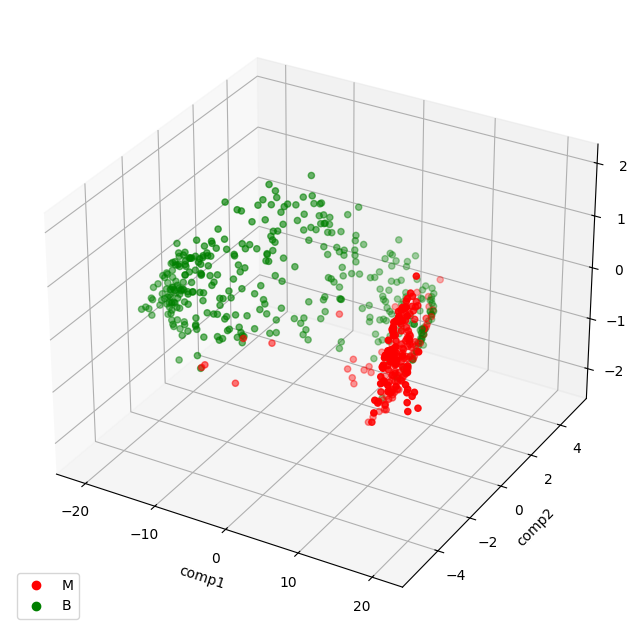

In [45]:
def base_scatter():
    diagnosis_map = {'M': -1, 'B': 1}
    df['diagnosis_mapped'] = df['diagnosis'].map(diagnosis_map)

    # Perform t-SNE
    tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(X)
    tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])
    tsne_df['diagnosis'] = df['diagnosis_mapped']

    # Plotting
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=tsne_df['diagnosis'],
                        cmap=ListedColormap(['red', 'green']))

    # Labels and legend
    ax.set_xlabel('comp1')
    ax.set_ylabel('comp2')
    ax.set_zlabel('comp3')
    legend = plt.legend(*scatter.legend_elements(), loc='lower left')
    legend.get_texts()[0].set_text('M')
    legend.get_texts()[1].set_text('B')

    plt.show()

base_scatter()

As we've concluded before some dots are outside of what was expected, for example some red dots are far away from the others.

Now we're gonna check for the same plot but now taking into consideration the outliers and the methods to identfy them

### Z-Score

The Z-score quantifies how many standard deviations a data point is from the mean of the dataset. A Z-score of 0 signifies that the data point is at the mean. Positive or negative values indicate the number of standard deviations the data point is above or below the mean, respectively. This measurement is crucial for identifying outliers, which we define as observations that lie beyond 3 standard deviations from the mean.

We'll start by appling the method and identifying the outliers in a new column named "outliers_zscore". Outliers will be marked as True and Inliers will be marked as False

In [39]:
# Drop the target variable for unsupervised learning
X = df.drop(['diagnosis'], axis=1)

X_scaled = X.apply(zscore)

# Detect outliers based on a threshold (e.g., 3 standard deviations)
outliers = (np.abs(X_scaled) > 3).any(axis=1)

pandas.set_option('future.no_silent_downcasting', True)
df['outliers_zscore'] = outliers.astype(int).replace({1: True, 0: False}) # Add a column to indicate outliers based on z-score method 

# check if the column was added
df.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_mapped,outliers_zscore
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,-1,True
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,-1,False
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,-1,False
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,-1,True
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,-1,False
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,-1,False
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,-1,False
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,-1,False
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,-1,False
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,-1,True


Now, we'll check, in comparison to the base scatter plot, which values are actually marked as outliers.

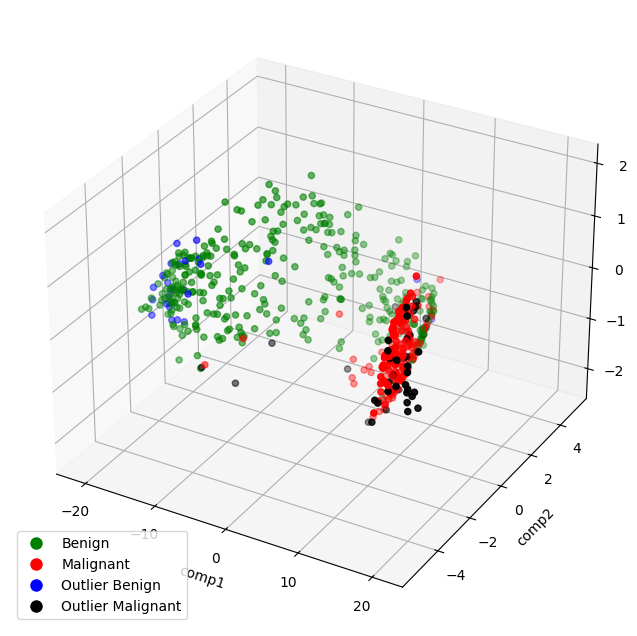

In [46]:

def zscore_scatter():
       colors = {
       ('B', False): 'green',  # Non-outlier Benign
       ('M', False): 'red',    # Non-outlier Malignant
       ('B', True): 'blue',    # Outlier Benign
       ('M', True): 'black'    # Outlier Malignant
       }

       # Apply the color map to each row in the dataframe
       outlier_colors = df.apply(lambda row: colors[(row['diagnosis'], row['outliers_zscore'])], axis=1)

       # Run t-SNE if not already done
       tsne = TSNE(n_components=3, perplexity=50, random_state=42).fit_transform(df.drop(['diagnosis', 'outliers_zscore'], axis=1))
       tsne_df = pandas.DataFrame(tsne, columns=['comp1', 'comp2', 'comp3'])

       # Create the scatter plot
       fig = plt.figure(figsize=(8, 8))
       ax = fig.add_subplot(111, projection='3d')
       scatter = ax.scatter(tsne_df['comp1'], tsne_df['comp2'], tsne_df['comp3'], c=outlier_colors)

       # Custom legend
       legend_elements = [
       Line2D([0], [0], marker='o', color='w', label='Benign',
              markerfacecolor='green', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Malignant',
              markerfacecolor='red', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Benign',
              markerfacecolor='blue', markersize=10),
       Line2D([0], [0], marker='o', color='w', label='Outlier Malignant',
              markerfacecolor='black', markersize=10)
       ]
       ax.legend(handles=legend_elements, loc='lower left')

       # Axis labels
       ax.set_xlabel('comp1')
       ax.set_ylabel('comp2')
       ax.set_zlabel('comp3')

       plt.show()

zscore_scatter()

Comparing these values some of the dots already suspected were confirmed as outliers. however others still look weird. We are gonnha check with another method

## Interquartile Range (IQR)

The Interquartile Range (IQR) measures the statistical dispersion of the data by evaluating the range between the first quartile (25th percentile) and the third quartile (75th percentile). It identifies the middle 50% of the dataset. To detect outliers, we utilize the IQR in conjunction with a multiplier, typically set at 1.5 times the IQR. Observations falling below the first quartile minus the multiplier times the IQR or above the third quartile plus the multiplier times the IQR are deemed outliers.

TODO: Fazer o algoritmo, mostrar o scatter. compará-los a nivel de percentagem de igualdade e quanto no total do dataset representam outliers - provavelmente mt - ver se fazer LFO vale a pena - verificar que é mais accurate e menos data - substtuir por mediana uma vez que removê-los poderia ser um problema dado o dataset ser pequeno. Por ultimo, ver o mapa de correlação e ver que valores estão altamente relacionados, remove-los.

Passar para os testes e modelos